# **Version 4 of the Stock Prediction Model**
### This model takes the potential of my RTX2060 which makes training much faster and efficient also I will focus on proper implimentation of the code and user readability.
### fixing of some minor issues and prediction

## **Web Scraping:** with the help of yfinance

In [ ]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#importing various libraries for the program/code
import yfinance as yf 
import pandas as pd
import numpy as np
from keras.layers import Dense , Dropout , LSTM , Input ,concatenate
from keras.models import Sequential , Model 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from statistics import stdev

one of various features used in the code are indices hence stock data and indices data are called in the below code 

In [ ]:
#stock that we are calling 

stock = yf.Ticker("RELIANCE.NS")
stock_data = stock.history(period='max')

In [ ]:
#taking indices related to the stock

index = yf.Ticker("^CNXIT")
sector_index_data = index.history(period='max')

In [ ]:
#taking nifty 50 as the market index

nifty = yf.Ticker("^NSEI")
nifty_data = nifty.history(period='max')

Lets see what the data we have extracted has in store for us :)

In [ ]:
# checking head of the data for stock 
stock_data.head

<bound method NDFrame.head of                    Open         High          Low        Close     Volume  \
Date                                                                        
1996-01-01    10.471227    10.527414    10.402270    10.509537   48051995   
1996-01-02    10.483999    10.535078    10.351193    10.427812   77875009   
1996-01-03    10.598927    11.081625    10.483999    10.506985   96602936   
1996-01-04    10.407378    10.440580    10.269464    10.409932  100099436   
1996-01-05    10.369070    10.369070    10.249033    10.338422   76935930   
...                 ...          ...          ...          ...        ...   
2022-01-04  2415.899902  2461.000000  2404.000000  2458.100098    5006225   
2022-01-05  2462.000000  2477.000000  2432.949951  2469.600098    5373618   
2022-01-06  2451.199951  2454.000000  2409.000000  2416.500000    6667483   
2022-01-07  2430.949951  2458.050049  2411.550049  2436.000000    6051239   
2022-01-10  2452.000000  2457.000000  2416.050

In [ ]:
#checking head of the data for sector index
sector_index_data.head

<bound method NDFrame.head of                     Open          High           Low         Close  Volume  \
Date                                                                         
2007-09-17   4645.850098   4673.250000   4562.700195   4573.549805       0   
2007-09-18   4577.700195   4593.350098   4558.600098   4576.750000       0   
2007-09-19   4674.100098   4700.750000   4650.250000   4667.299805       0   
2007-09-20   4666.000000   4666.000000   4558.200195   4566.049805       0   
2007-09-21   4559.149902   4632.100098   4476.850098   4603.850098       0   
...                  ...           ...           ...           ...     ...   
2022-01-04  39243.500000  39446.699219  38828.601562  39370.699219   19900   
2022-01-05  39261.550781  39293.148438  38409.250000  38609.148438   25200   
2022-01-06  38181.351562  38206.601562  37757.199219  38009.000000   25900   
2022-01-07  38140.148438  38394.800781  38003.148438  38139.851562   21600   
2022-01-10  38596.750000  38621.89

In [ ]:
#checking head of the nifts dataset
nifty_data.head

<bound method NDFrame.head of                     Open          High           Low         Close  Volume  \
Date                                                                         
2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902       0   
2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195       0   
2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098       0   
2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805       0   
2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805       0   
...                  ...           ...           ...           ...     ...   
2022-01-04  17681.400391  17827.599609  17593.550781  17805.250000  247400   
2022-01-05  17820.099609  17944.699219  17748.849609  17925.250000  251500   
2022-01-06  17768.500000  17797.949219  17655.550781  17745.900391  236500   
2022-01-07  17797.599609  17905.000000  17704.550781  17812.699219  239300   
2022-01-10  17913.300781  18017.44

Ploting all three Graphs to see what visually we can apprehend 

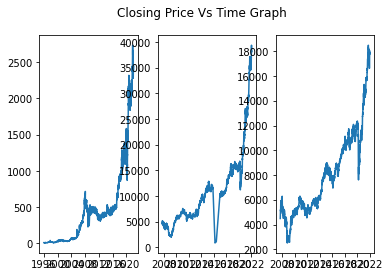

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Closing Price Vs Time Graph')
ax1.plot(stock_data.Close)
ax2.plot(sector_index_data.Close)
ax3.plot(nifty_data.Close)

## **Feature Engg:** 
here we are going to extract meaning full data from the provided dataset 

1. droping unnessesary cloumns from the dataset

In [ ]:
# we created new dataset test that is copied version of the original stock_data dataset
test_data = stock_data
test_data.drop(['Dividends','Stock Splits'],axis='columns', inplace=True)
test_data = test_data.reset_index()
nifty_data = nifty_data.reset_index()
test_data.drop('Date',axis = 'columns',inplace = True)
nifty_data.drop('Date',axis = 'columns',inplace = True)

2. Closing price of the stock,nifty,sector index etc

In [ ]:
#Closing price
closing_list = list(test_data.loc[len(test_data)-len(sector_index_data):,'Close'])
#volume list
volume_list = list(test_data.loc[len(test_data)-len(sector_index_data):,"Volume"])
#high_list
high_list = list(test_data.loc[len(test_data)-len(sector_index_data):,'High'])
#low_list
low_list = list(test_data.loc[len(test_data)-len(sector_index_data):,'Low'])
#opne_list
open_list = list(test_data.loc[len(test_data)-len(sector_index_data):,'Open'])
#closing price of the sector index
sector_closing_list = list(sector_index_data.loc[:,'Close'])

#closing price of the nifty index
nifty_closing_list = list(nifty_data.loc[len(nifty_data)-len(sector_index_data):,'Close'])

3. Ema 200,100,50

In [ ]:
#major variable assigning 

#smoothning constants for all three emas
smoothning_constant_200 = float(2/201)
smoothning_constant_100 = float(2/101)
smoothning_constant_50 = float(2/51)

#first ema or sma for all three emas
#200
first_200_rows = test_data.loc[0:199, 'Close']
first_200_ema = float(sum(first_200_rows)/200)

#100
first_100_rows = test_data.loc[:99 , 'Close']
first_100_ema = float(sum(first_100_rows)/100)

#50
first_50_rows = test_data.loc[:49 , 'Close']
first_50_ema = float(sum(first_50_rows)/50)

In [ ]:
#ema of first 200 ema in a list format so that it can further concatinate with the dataset
ema_list_200 = []
ema_list_200.append(first_200_ema) 

for i in range(len(closing_list)-200):
  
  ema_200 = (closing_list[i+199]*smoothning_constant_200)+((ema_list_200[i])*(1-smoothning_constant_200))
  ema_list_200.append(ema_200)

In [ ]:
#ema of first 100 ema in a list format so that it can further concaticated with the dataset
ema_list_100 = []
ema_list_100.append(first_100_ema)

for i in range(len(closing_list)-100):
  
  ema_100 = (closing_list[i+99]*smoothning_constant_100)+((ema_list_100[i])*(1-smoothning_constant_100))
  ema_list_100.append(ema_100)

In [ ]:
#ema of first 50 ema in a list format so that it can further concatinated with the dataset
ema_list_50 = []
ema_list_50.append(first_50_ema)

for i in range(len(closing_list)-50):
  ema_50 = (closing_list[i+49]*smoothning_constant_50)+((ema_list_50[i])*(1-smoothning_constant_50))
  ema_list_50.append(ema_50)

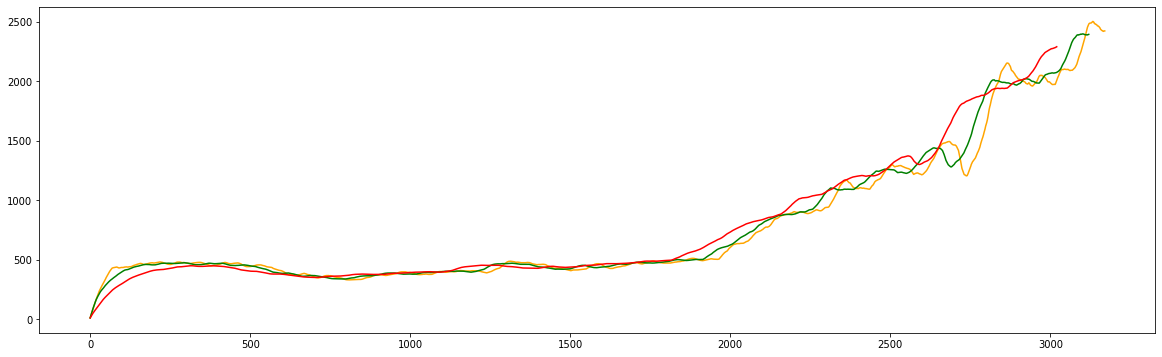

In [ ]:
#visualising two dataset

plt.figure(figsize =(20,6))
#plt.plot(test_data.Close)
plt.plot(ema_list_50,'orange')
plt.plot(ema_list_100,'green')
plt.plot(ema_list_200,'red')

4. Moving Average Convergence Divergence(MCDA)

In [ ]:
# value of (ema12-ema26)
#12 days ema 
smoothning_constant_12 = float(2/13)
#setting up variables
first_12_rows = test_data.loc[:11 , 'Close']
first_12_ema = float(sum(first_12_rows)/12)

#ema12
ema_list_12 = []
ema_list_12.append(first_12_ema)

for i in range(len(closing_list)-12):
  
  ema_12 = (closing_list[i+11]*smoothning_constant_12)+((ema_list_12[i])*(1-smoothning_constant_12))
  ema_list_12.append(ema_12)

  
#26 days ema for moving average convergence divergence
smoothning_constant_26 = float(2/27)
#setting up variables
first_26_rows = test_data.loc[:25 , 'Close']
first_26_ema = float(sum(first_26_rows)/26)

#ema26
ema_list_26 = []
ema_list_26.append(first_26_ema)

for i in range(len(closing_list)-26):
  
  ema_26 = (closing_list[i+25]*smoothning_constant_26)+((ema_list_26[i])*(1-smoothning_constant_26))
  ema_list_26.append(ema_26)

In [ ]:
del ema_list_12[:14]
MACD = np.array(ema_list_12) - np.array(ema_list_26)

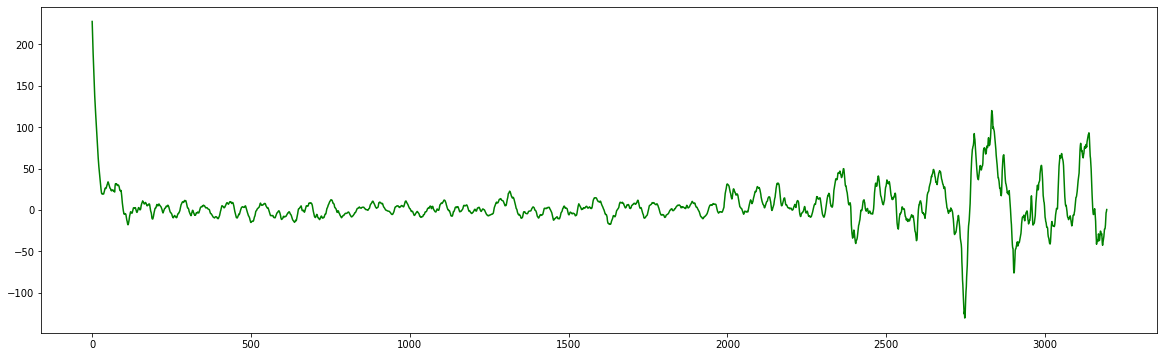

In [ ]:
plt.figure(figsize =(20,6))

plt.plot(MACD,'green')

5. Stochastic Ossilator

In [ ]:
low_high_list = []
for i in range(len(low_list)-14):
  lowest_list = low_list[i:i+14]
  highest_list = high_list[i:i+14]
  lowest_14 = min(lowest_list)
  highest_14 = min(highest_list)
  low_high_list.append([lowest_14,highest_14])


#formula for osscilator
k_list = [] 
for i in range(len(low_high_list)):
  upper_k = (closing_list[i+13]-low_high_list[i][0])*100
  lower_k = (low_high_list[i][1] - low_high_list[i][0])*100
  percent_k = upper_k/lower_k if lower_k != 0 else 0
  k_list.append(percent_k)

#refining the data and putthing it into the occilstior list
stochastic_osscillator = []
for i in k_list:
  if i <= 100:
    stochastic_osscillator.append(i)
  else:
    stochastic_osscillator.append(100.00)

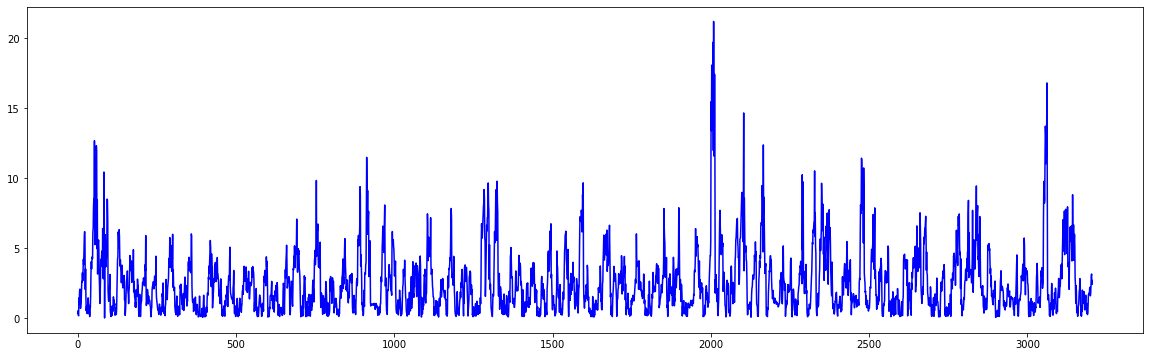

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(stochastic_osscillator,'blue')

6. RSI

In [ ]:
#from the closing price list we will create new pos change and neg change list
pos_change = [0]
neg_change = [0]
change  = 0
for i in range(1,len(closing_list)):
  change = closing_list[i-1] - closing_list[i]
  if change < 0:
    neg_change.append(abs(change))
    pos_change.append(0)
  else:
    pos_change.append(change)
    neg_change.append(0)


#creating list of average loss and average gain 
average_loss = []
average_gain = []
 
for i in range(len(pos_change)-14):
  sum_gain = 0
  sum_loss = 0
  for j in range(0,14):
    sum_gain+= pos_change[i+j]
    sum_loss+= neg_change[i+j]
  average_gain.append(sum_gain/14)
  average_loss.append(sum_loss/14)

# creating the list of relitive strength
rs = []

for i in range(len(average_loss)):
  if average_loss[i] == 0:
    rs.append(0)
  else:
    rs.append(average_gain[i]/average_loss[i])


In [ ]:
RSI = []
for i in range(len(rs)):
  RSI.append(100-(100/(1+rs[i])))

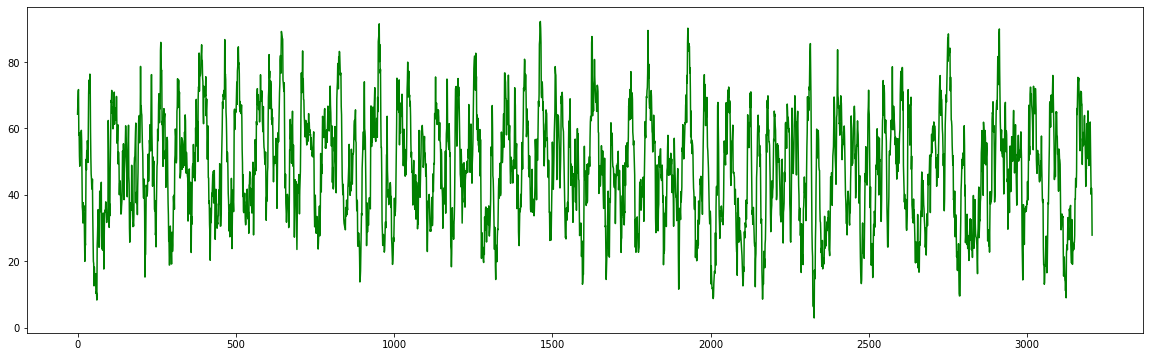

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(RSI,'green')

7. Bolinger Band

In [ ]:
#to create bolinger band you need to first make the 20 days MA
MA_BB = []
MA_BB = stock_data.rolling(window = 20)['Close'].mean() 

MA_BB = list(MA_BB)

#calcualting Standard daviation of 20 days
SD_BB = []

for i in range(len(closing_list)-20):
  day_20_SD = []
  for j in range(0,20):
    day_20_SD.append(closing_list[i+j])
  item = pd.Series(day_20_SD)
  SD_BB.append(item.std())


MA_BB = MA_BB[len(MA_BB)-len(SD_BB):]
# puting all into the bolinger fromula
BUB = []
BLB = []
value_upper = 0
value_lower = 0
for i in range(len(MA_BB)):
  value_upper = MA_BB[i] + (2*SD_BB[i])
  value_lower = MA_BB[i] - (2*SD_BB[i]) 

  BUB.append(value_upper)
  BLB.append(value_lower)

#result of the bulinger band
Bolinger_band_width = []
for i in range(len(BUB)):
  Bolinger_band_width.append(BUB[i]-BLB[i])



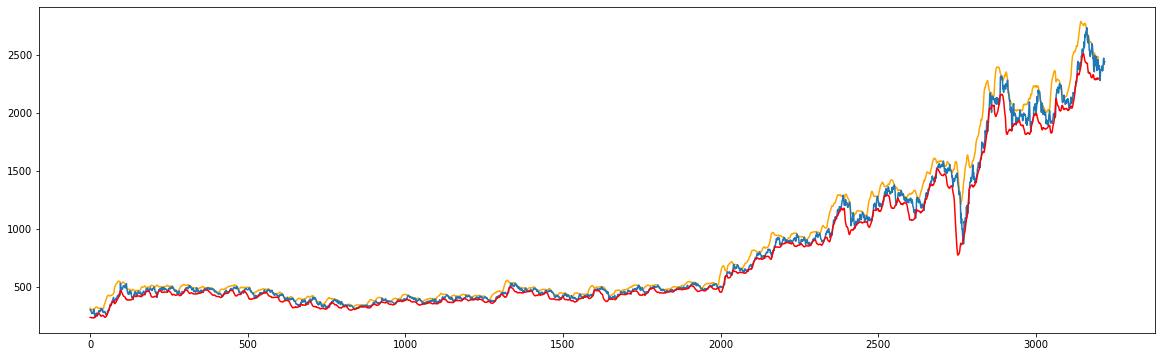

In [ ]:
#visual representation of the bolinger band
plt.figure(figsize =(20,6))
plt.plot(BUB,'orange')
plt.plot(closing_list)
plt.plot(BLB, 'red')

8. 90 days high

In [ ]:
#creating a dataset that shows us the 90 days high of the stock
day_high_90 = []
value_high = 0
for i in range(len(closing_list)-90):
  temp_list = []
  for j in range(0,90):
    temp_list.append(high_list[i+j])
  value_high = max(temp_list)
  day_high_90.append(value_high)


In [ ]:
print(type(day_high_90))

<class 'list'>


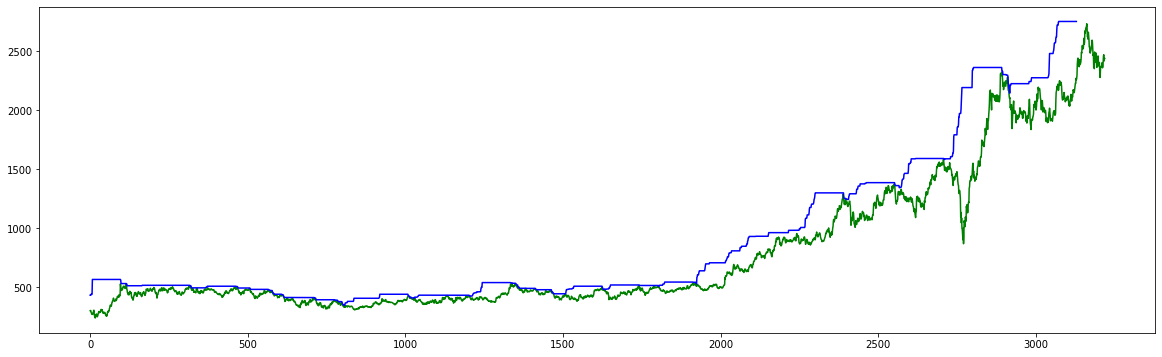

In [ ]:
#visualisation of the data
fig = plt.figure(figsize=(20,6))
plt.plot(closing_list,'green')
plt.plot(day_high_90,'blue')

9. Fibonachi retractment:23.6%,38.2%,61.8% and 78.6%

## **Concatenation of the dataset**

In [ ]:
print(len(closing_list))
print(len(ema_list_200))

3220
3021


In [ ]:
len(test_data.Open)

6548

In [ ]:
df1=pd.DataFrame(closing_list[len(closing_list)-len(ema_list_200):], columns=['Closing Price'])
df2=pd.DataFrame(ema_list_200, columns=['EMA200'])
df3=pd.DataFrame(ema_list_100[len(ema_list_100)-len(ema_list_200):], columns=['EMA100'])
df4=pd.DataFrame(ema_list_50[len(ema_list_50)-len(ema_list_200):], columns=['EMA50'])
df5=pd.DataFrame(MACD[len(MACD)-len(ema_list_200):], columns=['MACD'])
df6=pd.DataFrame(stochastic_osscillator[len(stochastic_osscillator)-len(ema_list_200):], columns=['S.O.'])
df7=pd.DataFrame(volume_list[len(volume_list)-len(ema_list_200):], columns=['Volume'])
df8=pd.DataFrame(RSI[len(RSI)-len(ema_list_200):] , columns = ['RSI'])
df9=pd.DataFrame(sector_closing_list[len(sector_closing_list)-len(ema_list_200):],columns = ["Sector Index"] )
df10=pd.DataFrame(high_list[len(high_list)-len(ema_list_200):] , columns = ["High"])
df11 =pd.DataFrame(low_list[len(low_list)-len(ema_list_200):] , columns = ["Low"])
df12 = pd.DataFrame(nifty_closing_list[len(nifty_closing_list)-len(ema_list_200):] , columns = ["nifty"])
df13 = pd.DataFrame(Bolinger_band_width[len(Bolinger_band_width)-len(ema_list_200):] , columns = ['Bolinger'])
df14 = pd.DataFrame(SD_BB[len(SD_BB)-len(ema_list_200):] , columns = ['Std'])
df15 = pd.DataFrame(day_high_90[len(day_high_90)-len(ema_list_200):] , columns = ['90 day high'])
df16 = pd.DataFrame(open_list[len(open_list)-len(ema_list_200):] , columns = ['open'])
final_dataframe = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16],axis=1)

final_dataframe.tail(10)

,Closing Price,EMA200,EMA100,EMA50,MACD,S.O.,Volume,RSI,Sector Index,High,Low,nifty,Bolinger,Std,90 day high,open
3011,2398.399902,2279.109838,2390.863604,2427.446467,-32.061919,1.740635,2941883,51.381623,38357.800781,2404.850098,2373.050049,17233.250000,205.328824,51.332206,2751.350098,2375.600098
3012,2402.500000,2280.296803,2391.012838,2426.307386,-27.474023,2.138513,7118779,52.392544,38274.648438,2419.000000,2382.100098,17213.599609,204.998841,51.249710,2751.350098,2391.000000
3013,2359.100098,2281.512756,2391.240306,2425.373763,-23.239350,2.196465,13537254,57.146636,38658.800781,2404.949951,2345.600098,17203.949219,192.390658,48.097664,2751.350098,2400.000000
3014,2368.149902,2282.284769,2390.603866,2422.774796,-23.118852,1.583039,4373768,61.933774,38701.050781,2383.899902,2360.000000,17354.050781,171.147199,42.786800,2751.350098,2373.000000
3015,2403.850098,2283.139148,2390.159233,2420.632643,-22.039059,1.710951,2502073,55.487972,39123.800781,2407.949951,2363.550049,17625.699219,169.486709,42.371677,2751.350098,2365.000000
3016,2458.100098,2284.340252,2390.430340,2419.974504,-18.094032,2.215548,5006225,46.916445,39370.699219,2461.000000,2404.000000,17805.250000,170.176275,42.544069,2751.350098,2415.899902
3017,2469.600098,2286.069206,2391.770335,2421.469625,-10.469363,2.982332,5373618,40.164484,38609.148438,2477.000000,2432.949951,17925.250000,183.671320,45.917830,2751.350098,2462.000000
3018,2416.500000,2287.895384,2393.311518,2423.357095,-3.458932,3.144876,6667483,42.034407,38009.000000,2454.000000,2409.000000,17745.900391,196.860839,49.215210,2751.350098,2451.199951
3019,2436.000000,2289.175032,2393.770696,2423.088189,-2.162916,2.394345,6051239,40.542216,38139.851562,2458.050049,2411.550049,17812.699219,188.086268,47.021567,2751.350098,2430.949951
3020,2438.000000,2290.635977,2394.606920,2423.594535,0.432685,2.672861,4266148,27.870021,38212.199219,2457.000000,2416.050049,18003.300781,181.521568,45.380392,2751.350098,2452.000000


## **Scaling the dataset using standard scaler**

In [ ]:
# need to split the dataset into 3 standerd scaler module 

#first dataset contains first four columns 
first_dataset = pd.DataFrame(final_dataframe.loc[:,['Closing Price' ,
                                                    'EMA200',
                                                    'EMA100',
                                                    'EMA50',
                                                    'Sector Index',
                                                    "High",
                                                    "Low",
                                                    'nifty',
                                                    '90 day high',
                                                    'open']])
scaler_1 = StandardScaler()
first_dataset = scaler_1.fit_transform(first_dataset)
#first_dataset

#scond dataset contains macd and so
second_dataset = pd.DataFrame(final_dataframe.loc[:,['Std','MACD','S.O.','RSI','Bolinger']])
scaler_2 = StandardScaler()
second_dataset = scaler_2.fit_transform(second_dataset)
#second_dataset

#final dataset contains only one parmeter thus we need to transform the dataset into numpy reshape function 
third_dataset = pd.DataFrame(final_dataframe.loc[:,['Volume']])
third_dataset = np.array(third_dataset)
scaler_3 = StandardScaler()
third_dataset = scaler_3.fit_transform(third_dataset)

In [ ]:
#converting dataset into dataframe and concatinate it again for a full and final dataset 
first_dataframe = pd.DataFrame(first_dataset, columns = ['open',
                                                         'Closing Price',
                                                         'EMA200',
                                                         'EMA100',
                                                         'EMA50',
                                                         'Sector index'
                                                         ,'High','Low'
                                                         ,'nifty',
                                                         '90dayhigh'])

second_dataframe = pd.DataFrame(second_dataset, columns = ["Std",'MACD','S.O.','RSI','Bolinger'])
third_dataframe = pd.DataFrame(third_dataset,columns = ['Volume'])

final_scaled_dataframe = pd.concat([first_dataframe,second_dataframe,third_dataframe] , axis=1)
final_scaled_dataframe.tail(10)

,open,Closing Price,EMA200,EMA100,EMA50,Sector index,High,Low,nifty,90dayhigh,Std,MACD,S.O.,RSI,Bolinger,Volume
3011,2.607627,2.853002,2.846899,2.782909,3.675130,2.568314,2.610745,2.661317,2.813788,2.563714,1.048908,-1.645450,-0.318492,0.197035,1.048908,-0.973115
3012,2.614435,2.855220,2.847165,2.780947,3.663813,2.591515,2.625946,2.655214,2.813788,2.589242,1.045639,-1.438981,-0.140523,0.258629,1.045639,-0.280813
3013,2.542369,2.857492,2.847570,2.779339,3.716098,2.568478,2.564639,2.652217,2.813788,2.604161,0.920700,-1.248409,-0.114601,0.548290,0.920700,0.783019
3014,2.557396,2.858934,2.846435,2.774864,3.721849,2.533964,2.588826,2.698835,2.813788,2.559404,0.710191,-1.242986,-0.388984,0.839965,0.710191,-0.735786
3015,2.616677,2.860531,2.845642,2.771175,3.779388,2.573397,2.594789,2.783203,2.813788,2.546143,0.693736,-1.194392,-0.331769,0.447230,0.693736,-1.046011
3016,2.706761,2.862775,2.846126,2.770041,3.812992,2.660379,2.662730,2.838967,2.813788,2.630517,0.700569,-1.016855,-0.106066,-0.075024,0.700569,-0.630959
3017,2.725857,2.866005,2.848516,2.772616,3.709340,2.686612,2.711356,2.876237,2.813788,2.706935,0.834297,-0.673723,0.236913,-0.486413,0.834297,-0.570066
3018,2.637683,2.869417,2.851265,2.775866,3.627656,2.648901,2.671128,2.820535,2.813788,2.689032,0.964996,-0.358233,0.309619,-0.372481,0.964996,-0.355614
3019,2.670063,2.871808,2.852084,2.775403,3.645466,2.655542,2.675411,2.841281,2.813788,2.655465,0.878046,-0.299909,-0.026090,-0.463398,0.878046,-0.457753
3020,2.673384,2.874538,2.853575,2.776275,3.655313,2.653820,2.682970,2.900478,2.813788,2.690358,0.812994,-0.183099,0.098488,-1.235501,0.812994,-0.753624


## **Main Formula for the program**

In [ ]:
#converting the dataframe into numpy array
final_scaled_dataframe = np.array(final_scaled_dataframe)
final_scaled_dataframe.shape

(3021, 16)

In [ ]:
#this cell is only dedicated to the refinement of the dataset for further algorithems 

scaled = 0
input_set = 90
output_set = 10
for i in range(0,len(final_scaled_dataframe)+1,input_set):
  scaled = i

final_scaled_dataframe = final_scaled_dataframe[len(final_scaled_dataframe)-scaled:]

In [ ]:
#this is the main algorithem that we will be using for the creation of the train model d
X_train = []
Y_train = []
next_set = input_set+output_set

for i in range(0,len(final_scaled_dataframe)-input_set,output_set):

  X_train.append(final_scaled_dataframe[i:i+input_set,0:final_scaled_dataframe.shape[1]])
  Y_train.append(final_scaled_dataframe[i+input_set:i+next_set,0])



X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
#creating training and testing dataset 
Y_test = [Y_train[-1]]
Y_train = Y_train[:len(Y_train)-1]
X_test = [X_train[-1]]
X_train = X_train[:len(X_train)-1]

In [ ]:
X_train.shape

(287, 90, 16)

## **Model Creation**

In [ ]:
Y_train.shape

(287, 10)

In [ ]:

price = Input(shape = (X_train.shape[1],1), name = ' price')
open = Input(shape = (X_train.shape[1],1), name = 'open')
ema200 = Input(shape = (X_train.shape[1],1), name = 'ema200')
ema100 = Input(shape = (X_train.shape[1],1), name = 'ema100')
ema50 = Input(shape = (X_train.shape[1],1), name = 'ema50')
high = Input(shape = (X_train.shape[1],1) , name = 'high')
low = Input(shape = (X_train.shape[1],1),name ="low")
SI = Input(shape = (X_train.shape[1],1), name = "SI")
nifty = Input(shape = (X_train.shape[1],1) , name = 'nifty')
macd = Input(shape = (X_train.shape[1],1), name = 'macd')
so = Input(shape = (X_train.shape[1],1), name = 'so')
rsi = Input(shape = (X_train.shape[1],1), name = 'rsi')
boling = Input(shape = (X_train.shape[1],1) , name = 'boling')
volume = Input(shape = (X_train.shape[1],1), name = 'volume')
stand = Input(shape= (X_train.shape[1],1), name = 'Stand')
day90 = Input(shape = (X_train.shape[1],1), name = 'day90')




pricelayer = LSTM( 60 ,activation = 'tanh' , return_sequences=True , dropout = 0.1, go_backwards = True  )(price)
pricelayer = LSTM( 60 ,activation = 'tanh' , return_sequences=False  )(pricelayer)
pricelayer = Model(inputs = price , outputs = pricelayer)

openlayer = LSTM( 60 ,activation = 'tanh' , return_sequences=True , dropout = 0.1, go_backwards = True   )(open)
openlayer = LSTM( 60 ,activation = 'tanh' , return_sequences=False  )(openlayer)
openlayer = Model(inputs = open , outputs = openlayer)

ema200layer = LSTM( 60 ,activation = 'tanh' , return_sequences = True ,dropout = 0.1, go_backwards = True  )(ema200)
ema200layer = LSTM( 60 ,activation = 'tanh' , return_sequences = False )(ema200layer)
ema200layer = Model(inputs = ema200 , outputs = ema200layer)

ema100layer = LSTM(60 ,activation = 'tanh' ,return_sequences =True ,dropout = 0.1, go_backwards = True  )(ema100)
ema100layer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False )(ema100layer)
ema100layer = Model(inputs = ema100 , outputs = ema100layer)

ema50layer = LSTM( 60 ,activation = 'tanh' , return_sequences = True ,dropout = 0.1, go_backwards = True  )(ema50)
ema50layer = LSTM( 60 ,activation = 'tanh' , return_sequences = False )(ema50layer)
ema50layer = Model(inputs = ema50 , outputs = ema50layer)

macdlayer = LSTM( 60 ,activation = 'tanh' , return_sequences = True ,dropout = 0.1, go_backwards = True  )(macd)
macdlayer = LSTM( 60 ,activation = 'tanh' , return_sequences = False )(macdlayer)
macdlayer = Model(inputs = macd , outputs = macdlayer)

solayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = True ,dropout = 0.1, go_backwards = True   )(so)
solayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(solayer)
solayer = Model(inputs = so , outputs = solayer)

volumelayer = LSTM( 60 ,activation = 'tanh'  ,return_sequences = True ,dropout = 0.1, go_backwards = True  )(volume)
volumelayer = LSTM( 60 ,activation = 'tanh'  ,return_sequences = False )(volumelayer)
volumelayer = Model(inputs = volume , outputs = volumelayer)

rsilayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = True ,dropout = 0.1, go_backwards = True  )(rsi)
rsilayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(rsilayer)
rsilayer = Model(inputs = rsi , outputs = rsilayer)

SIlayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = True ,dropout = 0.1, go_backwards = True  )(SI)
SIlayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(SIlayer)
SIlayer = Model(inputs = SI , outputs = SIlayer)

highlayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = True ,dropout = 0.1, go_backwards = True  )(high)
highlayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(highlayer)
highlayer = Model(inputs = high , outputs = highlayer)

lowlayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = True ,dropout = 0.1, go_backwards = True  )(low)
lowlayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(lowlayer)
lowlayer = Model(inputs = low , outputs = lowlayer)

bollayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = True,dropout = 0.1, go_backwards = True )(boling)
bollayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(bollayer)
bollayer = Model(inputs = boling , outputs = bollayer)

niftylayer = LSTM( 60 ,activation = 'tanh' ,return_sequences =True ,dropout = 0.1, go_backwards = True )(nifty)
niftylayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(niftylayer)
niftylayer = Model(inputs = nifty , outputs = niftylayer)

standlayer = LSTM( 60 ,activation = 'tanh' ,return_sequences =True ,dropout = 0.1, go_backwards = True)(stand)
standlayer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(standlayer)
standlayer = Model(inputs = stand , outputs = standlayer)

day90layer = LSTM( 60 ,activation = 'tanh' ,return_sequences = True ,dropout = 0.1, go_backwards = True)(day90)
day90layer = LSTM( 60 ,activation = 'tanh' ,return_sequences = False  )(day90layer)
day90layer = Model(inputs = day90 , outputs = day90layer)


output_layer = concatenate([
                           pricelayer.output,
                            openlayer.output,
                            ema200layer.output,
                            ema100layer.output,
                            ema50layer.output,
                            SIlayer.output,
                            highlayer.output,
                            lowlayer.output,
                            niftylayer.output,
                            day90layer.output,
                            standlayer.output,
                            macdlayer.output,
                            solayer.output,
                            rsilayer.output,
                            bollayer.output,
                            volumelayer.output,
                                            ])
output = Dense(Y_train.shape[1] , activation = 'linear')(output_layer)

model_spm_3 = Model(
                inputs = [pricelayer.input,
                          openlayer.input,
                          ema200layer.input,
                          ema100layer.input,
                          ema50layer.input,
                          SIlayer.input,
                          highlayer.input,
                          lowlayer.input,
                          niftylayer.input,
                          day90layer.input,
                          standlayer.input,
                           macdlayer.input,
                          solayer.input,
                          rsilayer.input,
                          bollayer.input,
                          volumelayer.input,
                          ],
                outputs = output
  )

In [ ]:
model_spm_3.compile(optimizer='rmsprop'  ,loss = 'mean_absolute_error' , metrics = ['accuracy'])

In [ ]:
model_spm_3.summary()

Model: "model_67"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
 price (InputLayer)             [(None, 90, 1)]      0                                            
__________________________________________________________________________________________________
open (InputLayer)               [(None, 90, 1)]      0                                            
__________________________________________________________________________________________________
ema200 (InputLayer)             [(None, 90, 1)]      0                                            
__________________________________________________________________________________________________
ema100 (InputLayer)             [(None, 90, 1)]      0                                            
___________________________________________________________________________________________

In [ ]:
history = model_spm_3.fit([
                          X_train[:,:,0],
                           X_train[:,:,1],
                           X_train[:,:,2],
                           X_train[:,:,3],
                           X_train[:,:,4],
                           X_train[:,:,5],
                           X_train[:,:,6],
                           X_train[:,:,7],
                           X_train[:,:,8],
                           X_train[:,:,9],
                           X_train[:,:,10],
                           X_train[:,:,11],
                           X_train[:,:,12],
                           X_train[:,:,13],
                           X_train[:,:,14],
                           X_train[:,:,15]
                           ],
                          Y_train,
                          epochs = 10,
                          batch_size = 6,
                          validation_split = 0.1,)

Epoch 1/10
43/43 [==============================] - 80s 2s/step - loss: 0.0629 - accuracy: 0.1628 - val_loss: 0.7984 - val_accuracy: 0.2069
Epoch 2/10
43/43 [==============================] - 85s 2s/step - loss: 0.0591 - accuracy: 0.1783 - val_loss: 0.8073 - val_accuracy: 0.1034
Epoch 3/10
43/43 [==============================] - 86s 2s/step - loss: 0.0609 - accuracy: 0.1705 - val_loss: 0.8660 - val_accuracy: 0.0690
Epoch 4/10
43/43 [==============================] - 80s 2s/step - loss: 0.0646 - accuracy: 0.1589 - val_loss: 0.7661 - val_accuracy: 0.1034
Epoch 5/10
43/43 [==============================] - 81s 2s/step - loss: 0.0625 - accuracy: 0.1550 - val_loss: 0.6977 - val_accuracy: 0.1034
Epoch 6/10
43/43 [==============================] - 82s 2s/step - loss: 0.0617 - accuracy: 0.1512 - val_loss: 0.6383 - val_accuracy: 0.1379
Epoch 7/10
43/43 [==============================] - 81s 2s/step - loss: 0.0597 - accuracy: 0.1667 - val_loss: 0.8223 - val_accuracy: 0.2069
Epoch 8/10
43/43 [==

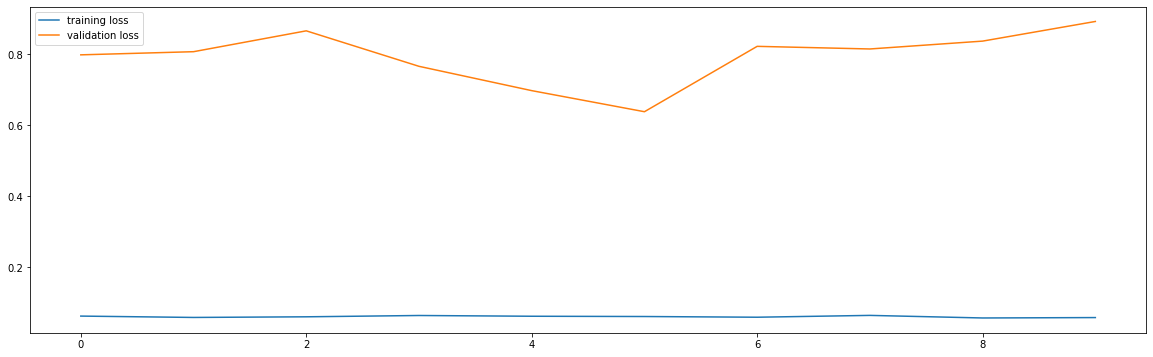

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(history.history['loss'] , label = 'training loss')
plt.plot(history.history['val_loss'] , label = 'validation loss')
#plt.ylim(0.006,0.6)
plt.legend()

In [ ]:
X_test = np.array(X_test)

In [ ]:
Y_predict = model_spm_3.predict([X_test[:,:,0],X_test[:,:,1],X_test[:,:,2],
                                 X_test[:,:,3],X_test[:,:,4],X_test[:,:,5],
                                 X_test[:,:,6],X_test[:,:,7],X_test[:,:,8],
                                 X_test[:,:,9],X_test[:,:,10],X_test[:,:,11],
                                 X_test[:,:,12],X_test[:,:,13],X_test[:,:,14],
                                 X_test[:,:,15]])

In [ ]:
Y_predict = Y_predict.T
Y_predict.shape

(10, 1)

In [ ]:
future_copies = np.repeat(Y_predict , 10 , axis = 1)
future_copies.shape
Y_predict_future = scaler_1.inverse_transform(future_copies)[:,0]

In [ ]:
Y_test= np.array(Y_test)
Y_test = Y_test.T

original_copies = np.repeat(Y_test , 10 , axis = 1)
original_copies.shape
Y_original = scaler_1.inverse_transform(original_copies)[:,0]

In [ ]:
print(Y_predict_future)

[1583.6628 1560.9071 1585.377  1532.7747 1572.701  1632.0096 1635.1328
 1559.5361 1593.5209 1689.0278]


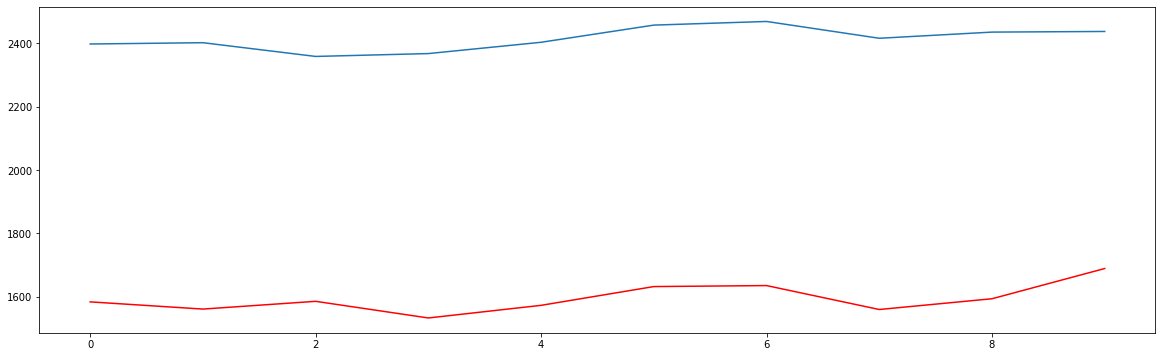

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(Y_predict_future , 'red')
plt.plot(Y_original , label = 'original price')

### The result will shock you as the prediction is quite close and almost immitate the original value the only difference being the price difference which will be overcome after we can get the optimum model with right parameter

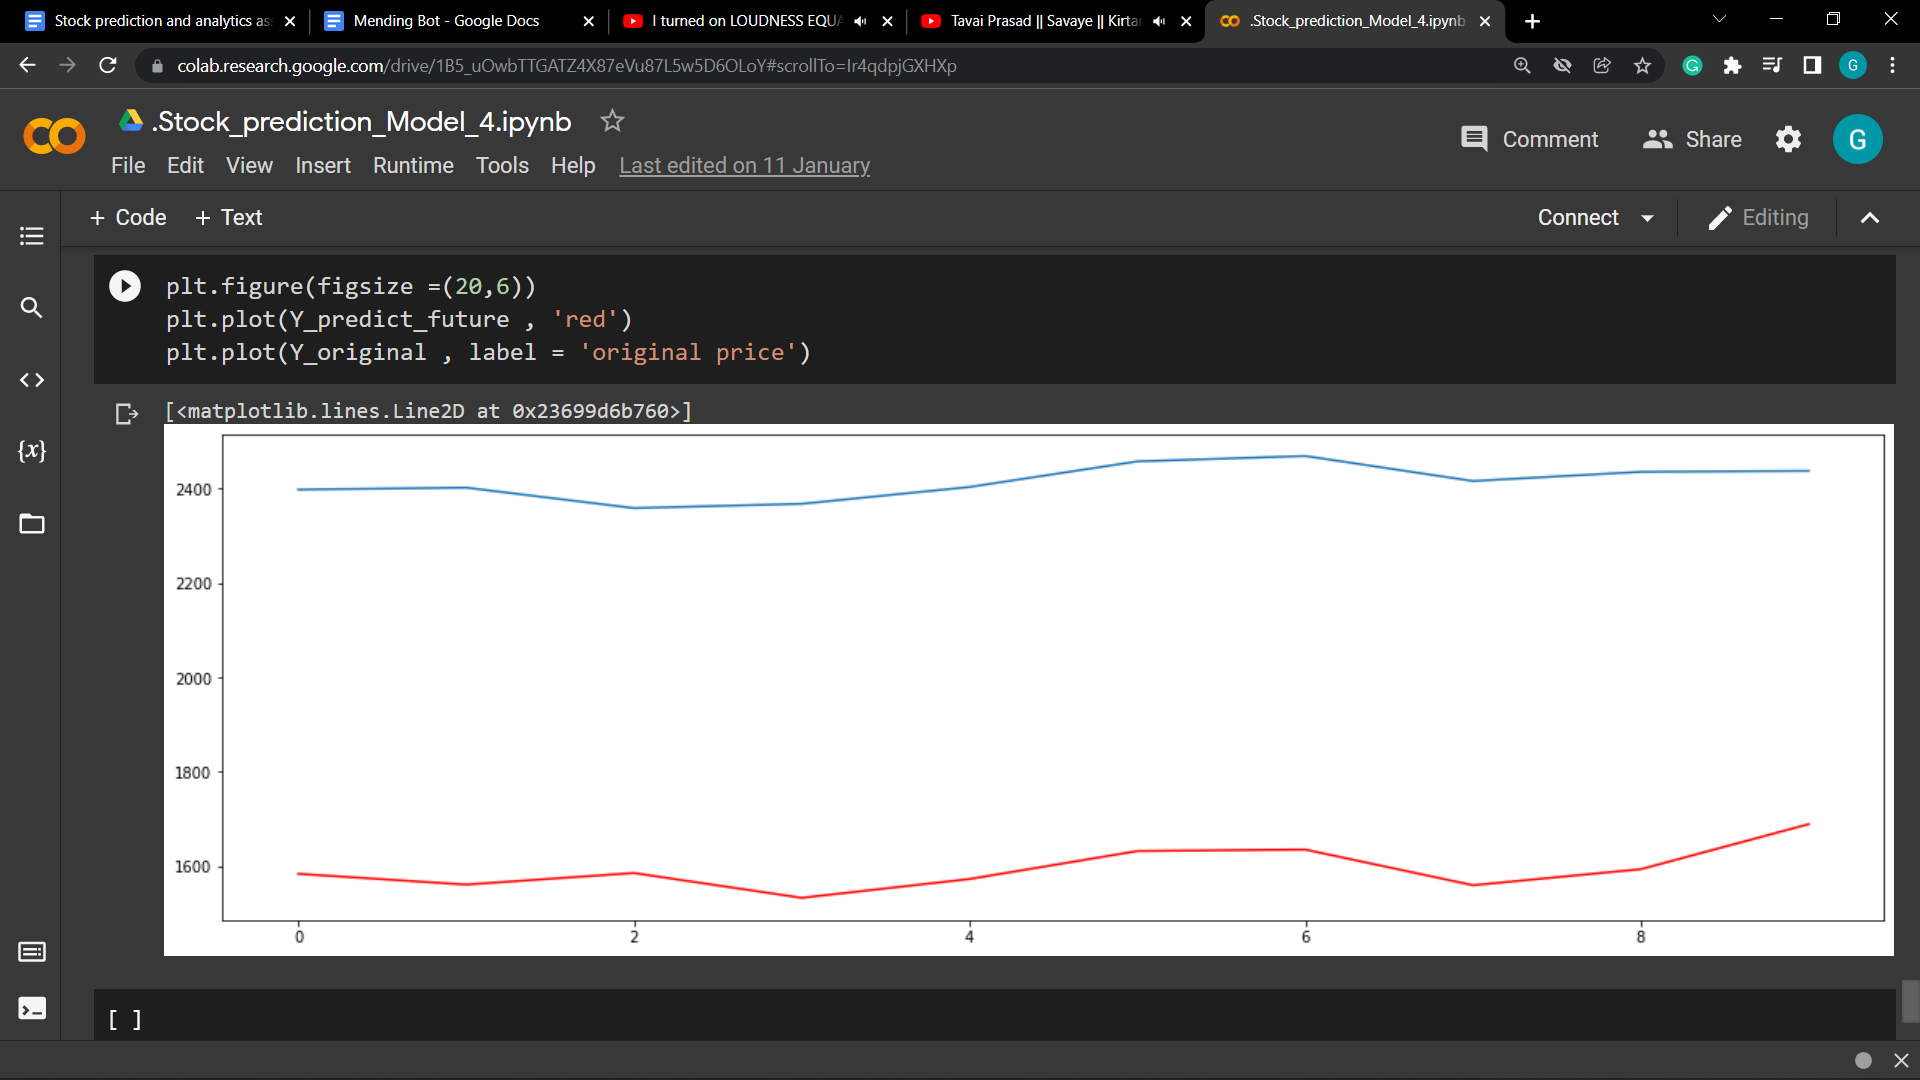